In [1]:
import numpy as np
import pandas as pd
import gymnasium as gym
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

# Custom modules
# from agent import *
from agent2 import QAgent


SEED = 42

np.random.seed(SEED)

In [2]:
env = gym.make('MountainCarContinuous-v0', render_mode='human')

agent = QAgent(
    env=env,
    discount_factor=0.99,
    initial_epsilon=1.0,
    epsilon_decay=0.99,
    min_epsilon=0.0,
    learning_rate=0.99,
    seed=SEED,
)

In [3]:
rewards = agent.learn(100)

  0%|          | 0/100 [00:00<?, ?it/s]

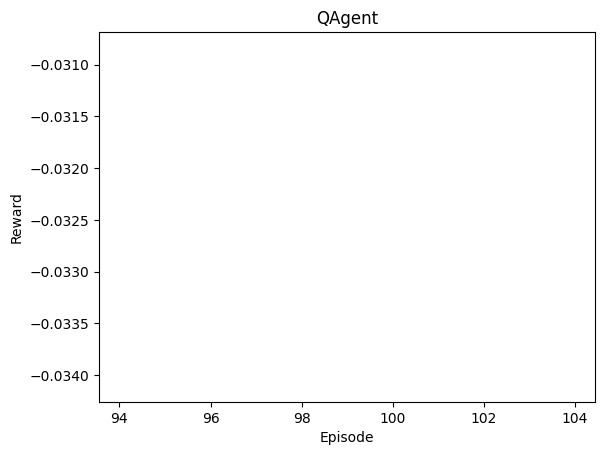

In [4]:
rewards = pd.Series(rewards)
fig, ax = plt.subplots()
ax.plot(rewards.rolling(100).mean())
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.set_title(agent.__class__.__name__)
plt.show()

In [5]:
# rewards = agent.play(1, render = False)

# print(f'Average reward: {np.mean(rewards)}')
# print(f'Std reward: {np.std(rewards)}')

env.close()